In [2]:
from sklearn import linear_model
from sklearn.neighbors import NearestNeighbors
import pandas as pd


def entry_variables(df, id_entry):
    col_labels = []
    if pd.notnull(df['Category'].iloc[id_entry]):
        for s in df['Category'].iloc[id_entry]:
            col_labels.append(s)
    return col_labels


def set_matrix(df, REF_VAR):
    for s in REF_VAR: df[s] = pd.Series([0 for _ in range(len(df))])
    colonnes = ['Category']
    for categorie in colonnes:
        for index, row in df.iterrows():
            if pd.isnull(row[categorie]): continue
            for s in row[categorie]:
                if s in REF_VAR: df.set_value(index, s, 1)
    return df


def cal_distance(df, id_entry):
    df_copy = df.copy(deep = True)

    #_____________________________________________________
    # Create additional variables to check the similarity
    variables = entry_variables(df_copy, id_entry)
    df_new = set_matrix(df_copy, variables)
    #____________________________________________________________________________________
    # determination of the closest neighbors: the distance is calculated / new variables
    X = df_new.as_matrix(variables)
    nbrs = NearestNeighbors(n_neighbors=31, algorithm='auto', metric='euclidean').fit(X)

    distances, indices = nbrs.kneighbors(X)
    xtest = df_new.iloc[id_entry].as_matrix(variables)
    xtest = xtest.reshape(1, -1)

    distances, indices = nbrs.kneighbors(xtest)

    return indices[0][:]

In [3]:
df = pd.read_csv('E:\columbia\data science\data_en_1950.csv',index_col=None)
df

,Rank,Streamer,Platform,Category,URL
0,1,kaerlol,虎牙,LOL,http://www.huya.com/kaerlol
1,2,xuxubaobao,龙珠,DNF,http://star.longzhu.com/xuxubaobao
2,3,66666,熊猫,PUBG,http://www.panda.tv/66666
3,4,haddis,虎牙,王者荣耀,http://www.huya.com/haddis
4,5,229346,斗鱼,TRAVELING,https://www.douyu.com/229346
5,6,dongxiaosa,虎牙,PUBG,http://www.huya.com/dongxiaosa
6,7,heigou,虎牙,PUBG,http://www.huya.com/heigou
7,8,xiaozhan,虎牙,PUBG,http://www.huya.com/xiaozhan
8,9,24422,斗鱼,PUBG,https://www.douyu.com/24422
9,10,44397,全民,LOL,http://www.quanmin.tv/44397


In [12]:
# id_entry = int(request.form['rank'])-1
id_entry = 8
#@app.route('/recommend_result/', methods=['POST'])
#@login_required
#def recommend_result_page():
#    try:
#        df = pd.read_csv('/home/jl4939/mysite/static/data/data_cn_1950.csv',index_col=None)
#        id_entry = int(request.form['rank'])-1

        # Verify the input value is in the range(1950)

In [13]:
        if id_entry >= 0 and id_entry <=1949:
            # Extract Streamer Function
            def extract_streamer(df, listed_streamer):
                like_streamer = ['_' for _ in range(31)]
                i = 0
                for index in listed_streamer:
                    like_streamer[i] = list(df.iloc[index][['Rank','Streamer', 'Platform','Category','URL']])
                    i += 1
                like_streamer.sort()
                for s in range(31):
                    if like_streamer[s][0] == id_entry+1:
                        del like_streamer[s]
                        break
                return like_streamer

            listed_streamer = cal_distance(df, id_entry)
            recommendation_list_thirty = extract_streamer(df, listed_streamer)
            recommendation_list = []
            for i in range(10):
                recommendation_list.append(recommendation_list_thirty[i])

listed_streamer
#recommendation_list_thirty

array([ 857,  733,  869, 1014,  611,  513,   98,  859,  861, 1678,  729,
        614, 1004,  341, 1010,   25, 1438, 1673, 1415,  345,  423, 1681,
       1683,  189,    2, 1659,   97,  504,   77, 1408, 1665], dtype=int64)

In [14]:
recommendation_list

[[3, '66666', '熊猫', 'PUBG', 'http://www.panda.tv/66666'],
 [26, '20360', '斗鱼', 'PUBG', 'https://www.douyu.com/20360'],
 [78, '10066', '熊猫', 'PUBG', 'http://www.panda.tv/10066'],
 [98, '199211', '全民', 'PUBG', 'http://www.quanmin.tv/199211'],
 [99, '80000', '熊猫', 'PUBG', 'http://www.panda.tv/80000'],
 [190, '339610', '斗鱼', 'PUBG', 'https://www.douyu.com/339610'],
 [342, 'lol77', '虎牙', 'PUBG', 'http://www.huya.com/lol77'],
 [346, '687423', '斗鱼', 'PUBG', 'https://www.douyu.com/687423'],
 [424, '652734', '熊猫', 'PUBG', 'http://www.panda.tv/652734'],
 [505, '101367', '斗鱼', 'PUBG', 'https://www.douyu.com/101367']]

In [15]:
df_copy = df.copy(deep = True)
variables = entry_variables(df_copy, id_entry)
part = variables
#variables = ''.join(part)
variables

['P', 'U', 'B', 'G']

In [16]:
df_new = set_matrix(df_copy, variables)
X = df_new.as_matrix(variables)
X[0:10,:]

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0]], dtype=int64)

In [20]:
nbrs = NearestNeighbors(n_neighbors=31, algorithm='auto', metric='euclidean').fit(X)
distances, indices = nbrs.kneighbors(X)

In [18]:
xtest = df_new.iloc[id_entry].as_matrix(variables)
xtest = xtest.reshape(1, -1)

distances, indices = nbrs.kneighbors(xtest)

array([[1, 1, 1, 1]], dtype=object)

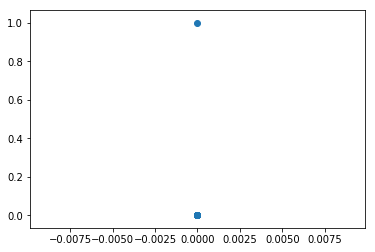

number of no-relavant: 1949
number of relavant: 1


In [21]:
import matplotlib.pyplot as plt
plt.scatter(distances[:, 0], distances[:, 1])
plt.show()

import numpy as np

feature1 = distances[:,0]
a = np.array(feature1)
al = list(a)
feature2 = distances[:,1]
b = np.array(feature2)
bl = list(b)
print('number of no-relavant:',bl.count(0))
print('number of relavant:',bl.count(1))

In [ ]:
        #else:
        #    flash("Rank Number must be between 1 to 1950 !")
         #   return redirect(url_for('recommend_page'))

   # except Exception as e:
    #    return str(e)
